In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("House Price Data.csv")
data.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [3]:
data =data.dropna()

In [4]:
data['date']=pd.to_datetime(data['date'])
data.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-05-02   313000.0       3.0       1.50         1340      7912     1.5   
1 2014-05-02  2384000.0       5.0       2.50         3650      9050     2.0   
2 2014-05-02   342000.0       3.0       2.00         1930     11947     1.0   
3 2014-05-02   420000.0       3.0       2.25         2000      8030     1.0   
4 2014-05-02   550000.0       4.0       2.50         1940     10500     1.0   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   
1           0     4          5        3370            280      1921   
2           0     0          4        1930              0      1966   
3           0     0          4        1000           1000      1963   
4           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

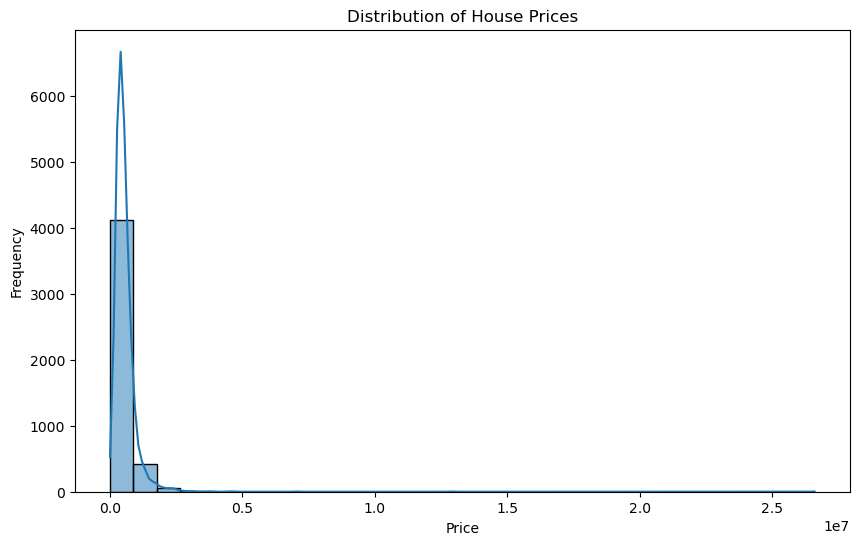

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

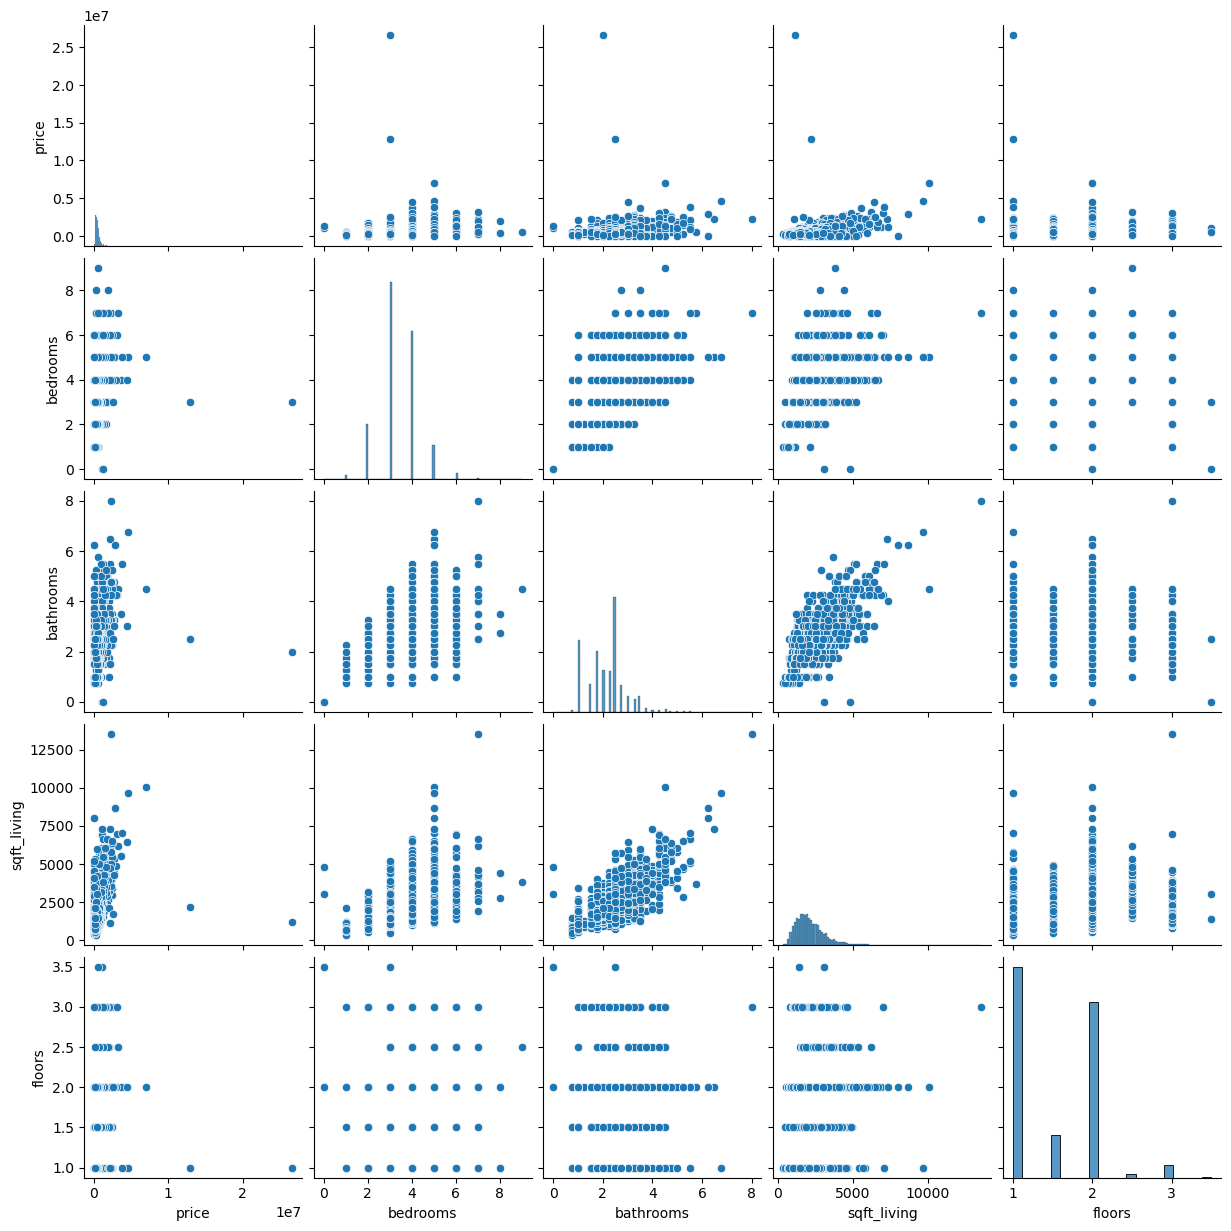

In [7]:
subset = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']
sns.pairplot(data[subset])
plt.show()

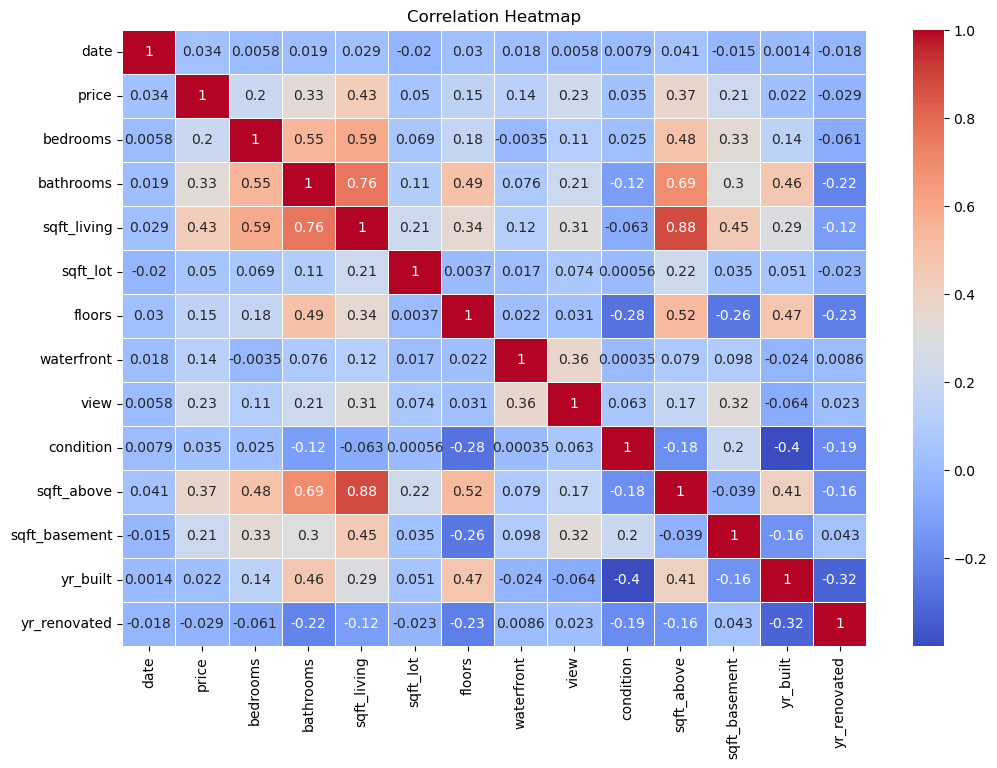

In [11]:
plt.figure(figsize=(12, 8))
corr = data.drop(["street","city","statezip","country"],axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

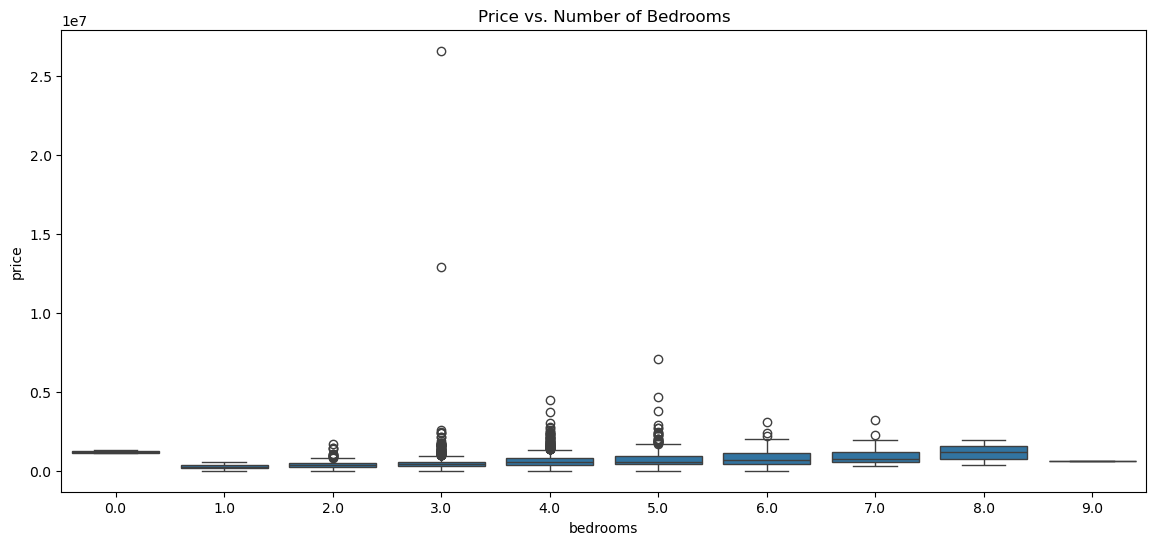

In [12]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('Price vs. Number of Bedrooms')
plt.show()

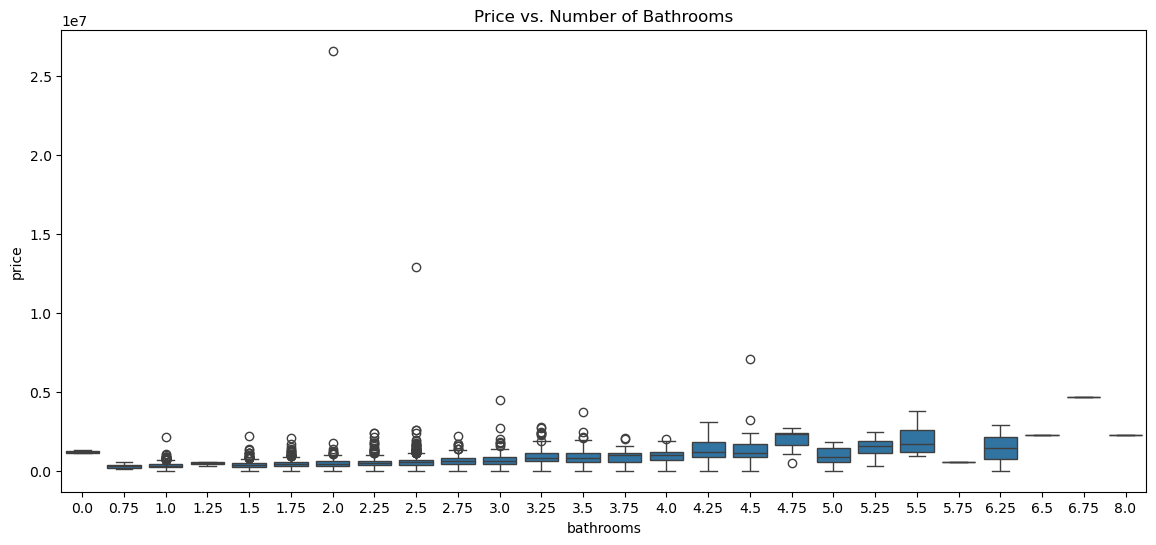

In [14]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='bathrooms', y='price', data=data)
plt.title('Price vs. Number of Bathrooms')
plt.show()

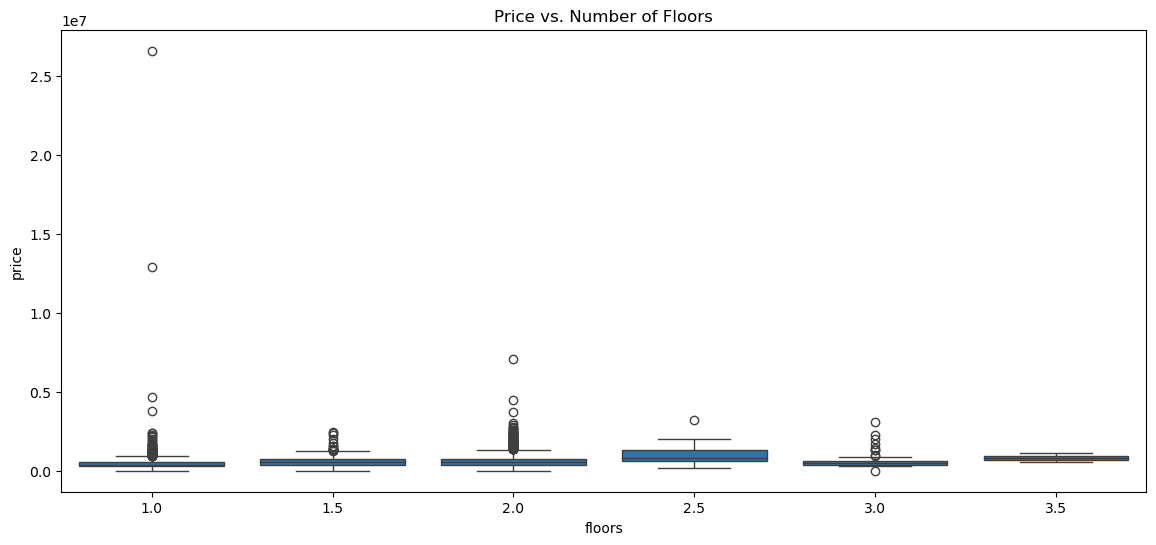

In [15]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='floors', y='price', data=data)
plt.title('Price vs. Number of Floors')
plt.show()

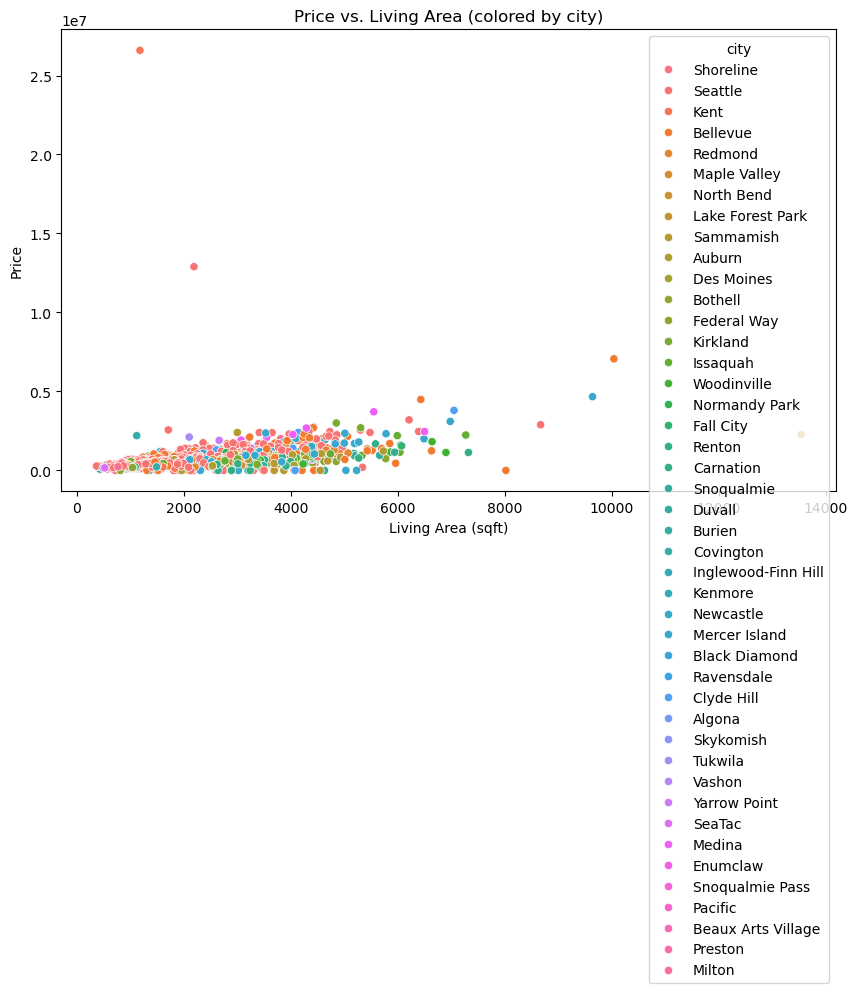

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=data, hue='city')
plt.title('Price vs. Living Area (colored by city)')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

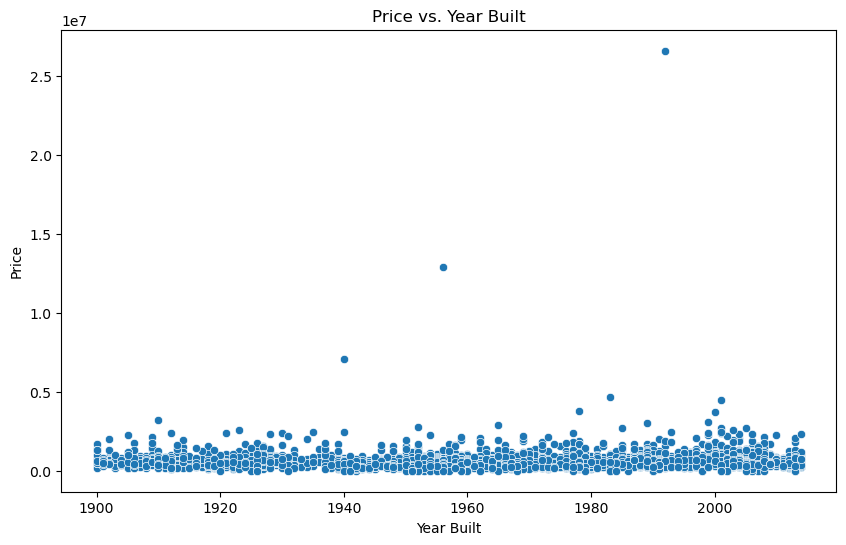

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yr_built', y='price', data=data)
plt.title('Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()

In [18]:
data.shape

(4600, 18)

In [19]:
from scipy import stats

# Calculate z-scores
z_scores = np.abs(stats.zscore(data['price']))

# Define a threshold (commonly 3)
threshold = 3

# Filter out the outliers
df_filtered = data[z_scores < threshold]


In [20]:
df_filtered

date          price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  313000.000000       3.0       1.50         1340      7912   
2    2014-05-02  342000.000000       3.0       2.00         1930     11947   
3    2014-05-02  420000.000000       3.0       2.25         2000      8030   
4    2014-05-02  550000.000000       4.0       2.50         1940     10500   
5    2014-05-02  490000.000000       2.0       1.00          880      6380   
...         ...            ...       ...        ...          ...       ...   
4595 2014-07-09  308166.666667       3.0       1.75         1510      6360   
4596 2014-07-09  534333.333333       3.0       2.50         1460      7573   
4597 2014-07-09  416904.166667       3.0       2.50         3010      7014   
4598 2014-07-10  203400.000000       4.0       2.00         2090      6630   
4599 2014-07-10  220600.000000       3.0       2.50         1490      8102   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
0        1.5           0     0          3        1340              0   
2        1.0           0     0          4        1930              0   
3        1.0           0     0          4        1000           1000   
4        1.0           0     0          4        1140            800   
5        1.0           0     0          3         880              0   
...      ...         ...   ...        ...         ...            ...   
4595     1.0           0     0          4        1510              0   
4596     2.0           0     0          3        1460              0   
4597     2.0           0     0          3        3010              0   
4598     1.0           0     0          3        1070           1020   
4599     2.0           0     0          4        1490              0   

      yr_built  yr_renovated                    street       city  statezip  \
0         1955          2005      18810 Densmore Ave N  Shoreline  WA 98133   
2         1966             0  26206-26214 143rd Ave SE       Kent  WA 98042   
3         1963             0           857 170th Pl NE   Bellevue  WA 98008   
4         1976          1992         9105 170th Ave NE    Redmond  WA 98052   
5         1938          1994            522 NE 88th St    Seattle  WA 98115   
...        ...           ...                       ...        ...       ...   
4595      1954          1979            501 N 143rd St    Seattle  WA 98133   
4596      1983          2009          14855 SE 10th Pl   Bellevue  WA 98007   
4597      2009             0          759 Ilwaco Pl NE     Renton  WA 98059   
4598      1974             0         5148 S Creston St    Seattle  WA 98178   
4599      1990             0         18717 SE 258th St  Covington  WA 98042   

     country  
0        USA  
2        USA  
3        USA  
4        USA  
5        USA  
...      ...  
4595     USA  
4596     USA  
4597     USA  
4598     USA  
4599     USA  

[4566 rows x 18 columns]

In [21]:
df_filtered.shape

(4566, 18)

In [22]:
df=df_filtered

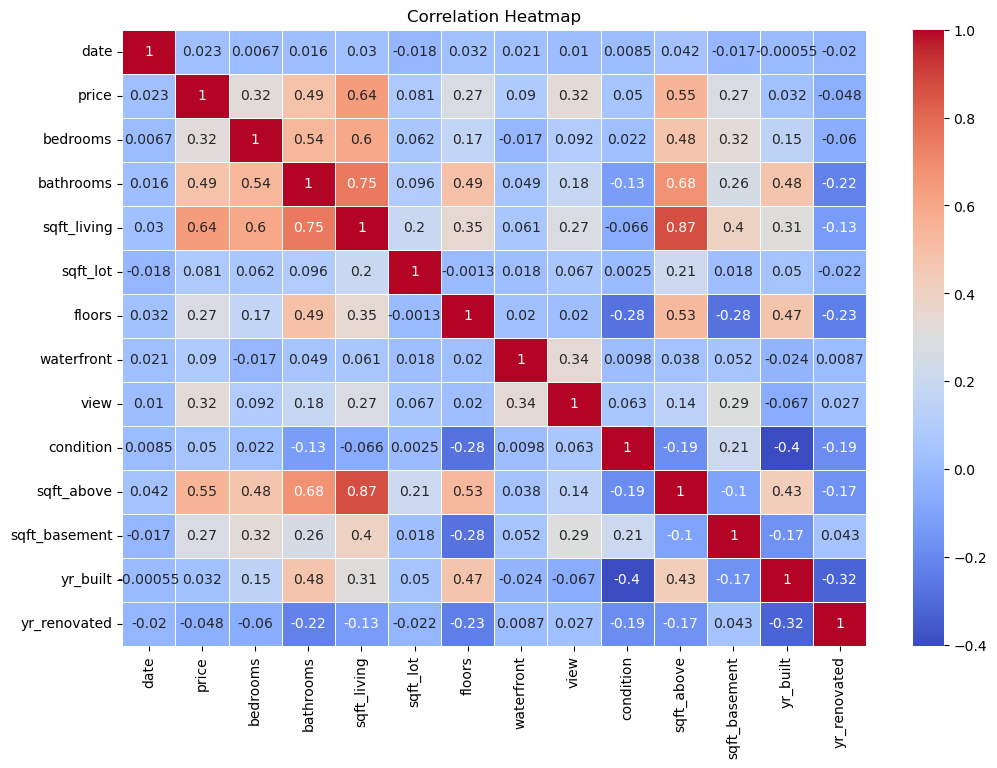

In [23]:
plt.figure(figsize=(12, 8))
corr = df.drop(["street","city","statezip","country"],axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_22604\2317591416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price', y='city', data=df, order=df.groupby('city')['price'].median().sort_values().index, palette="coolwarm")


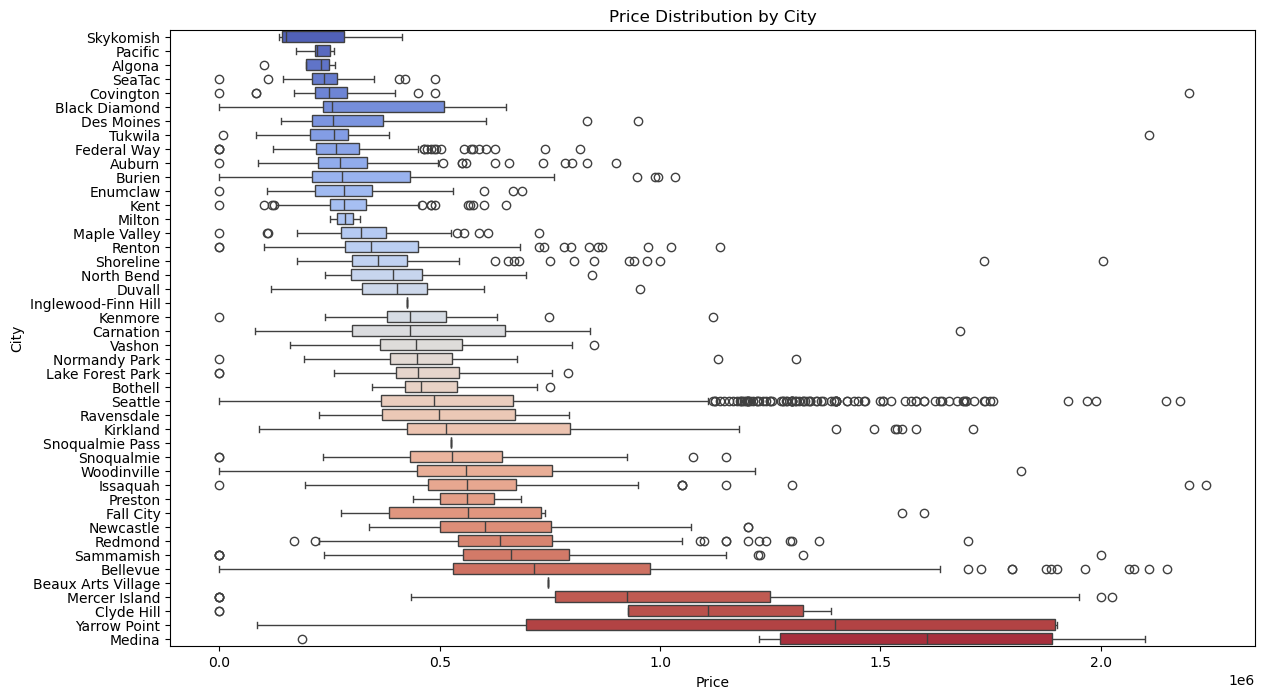

In [24]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='price', y='city', data=df, order=df.groupby('city')['price'].median().sort_values().index, palette="coolwarm")
plt.title('Price Distribution by City')
plt.xlabel('Price')
plt.ylabel('City')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_22604\2882121419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price', y='country', data=df, order=df.groupby('country')['price'].median().sort_values().index, palette="coolwarm")


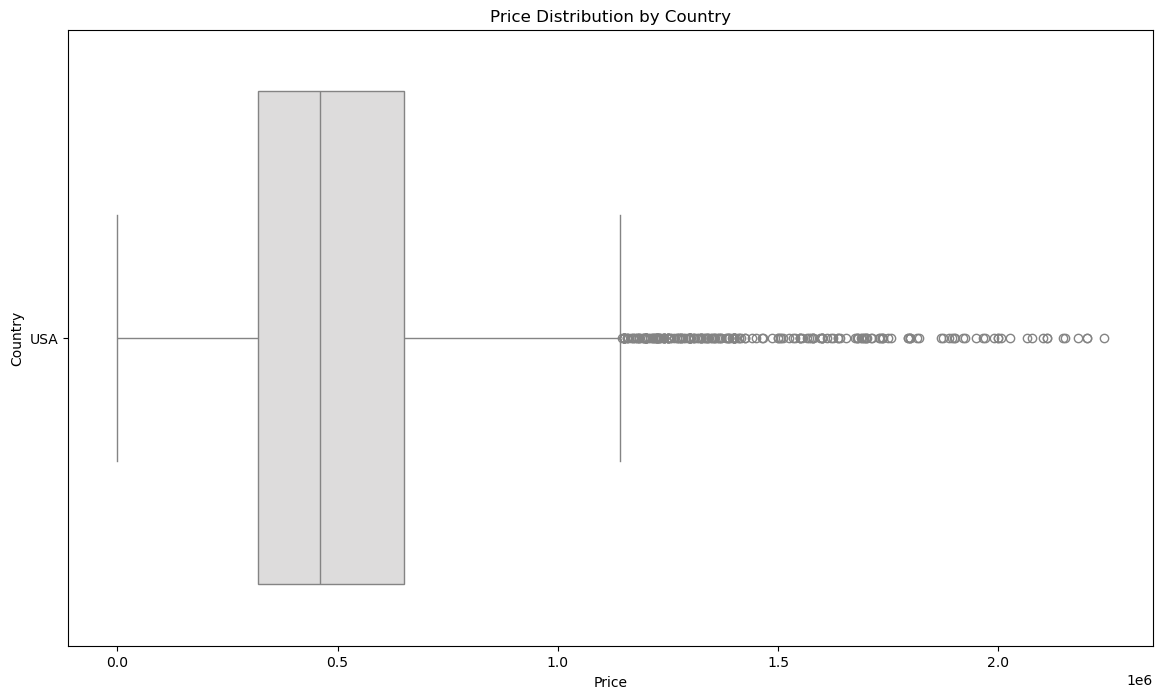

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='price', y='country', data=df, order=df.groupby('country')['price'].median().sort_values().index, palette="coolwarm")
plt.title('Price Distribution by Country')
plt.xlabel('Price')
plt.ylabel('Country')
plt.show()

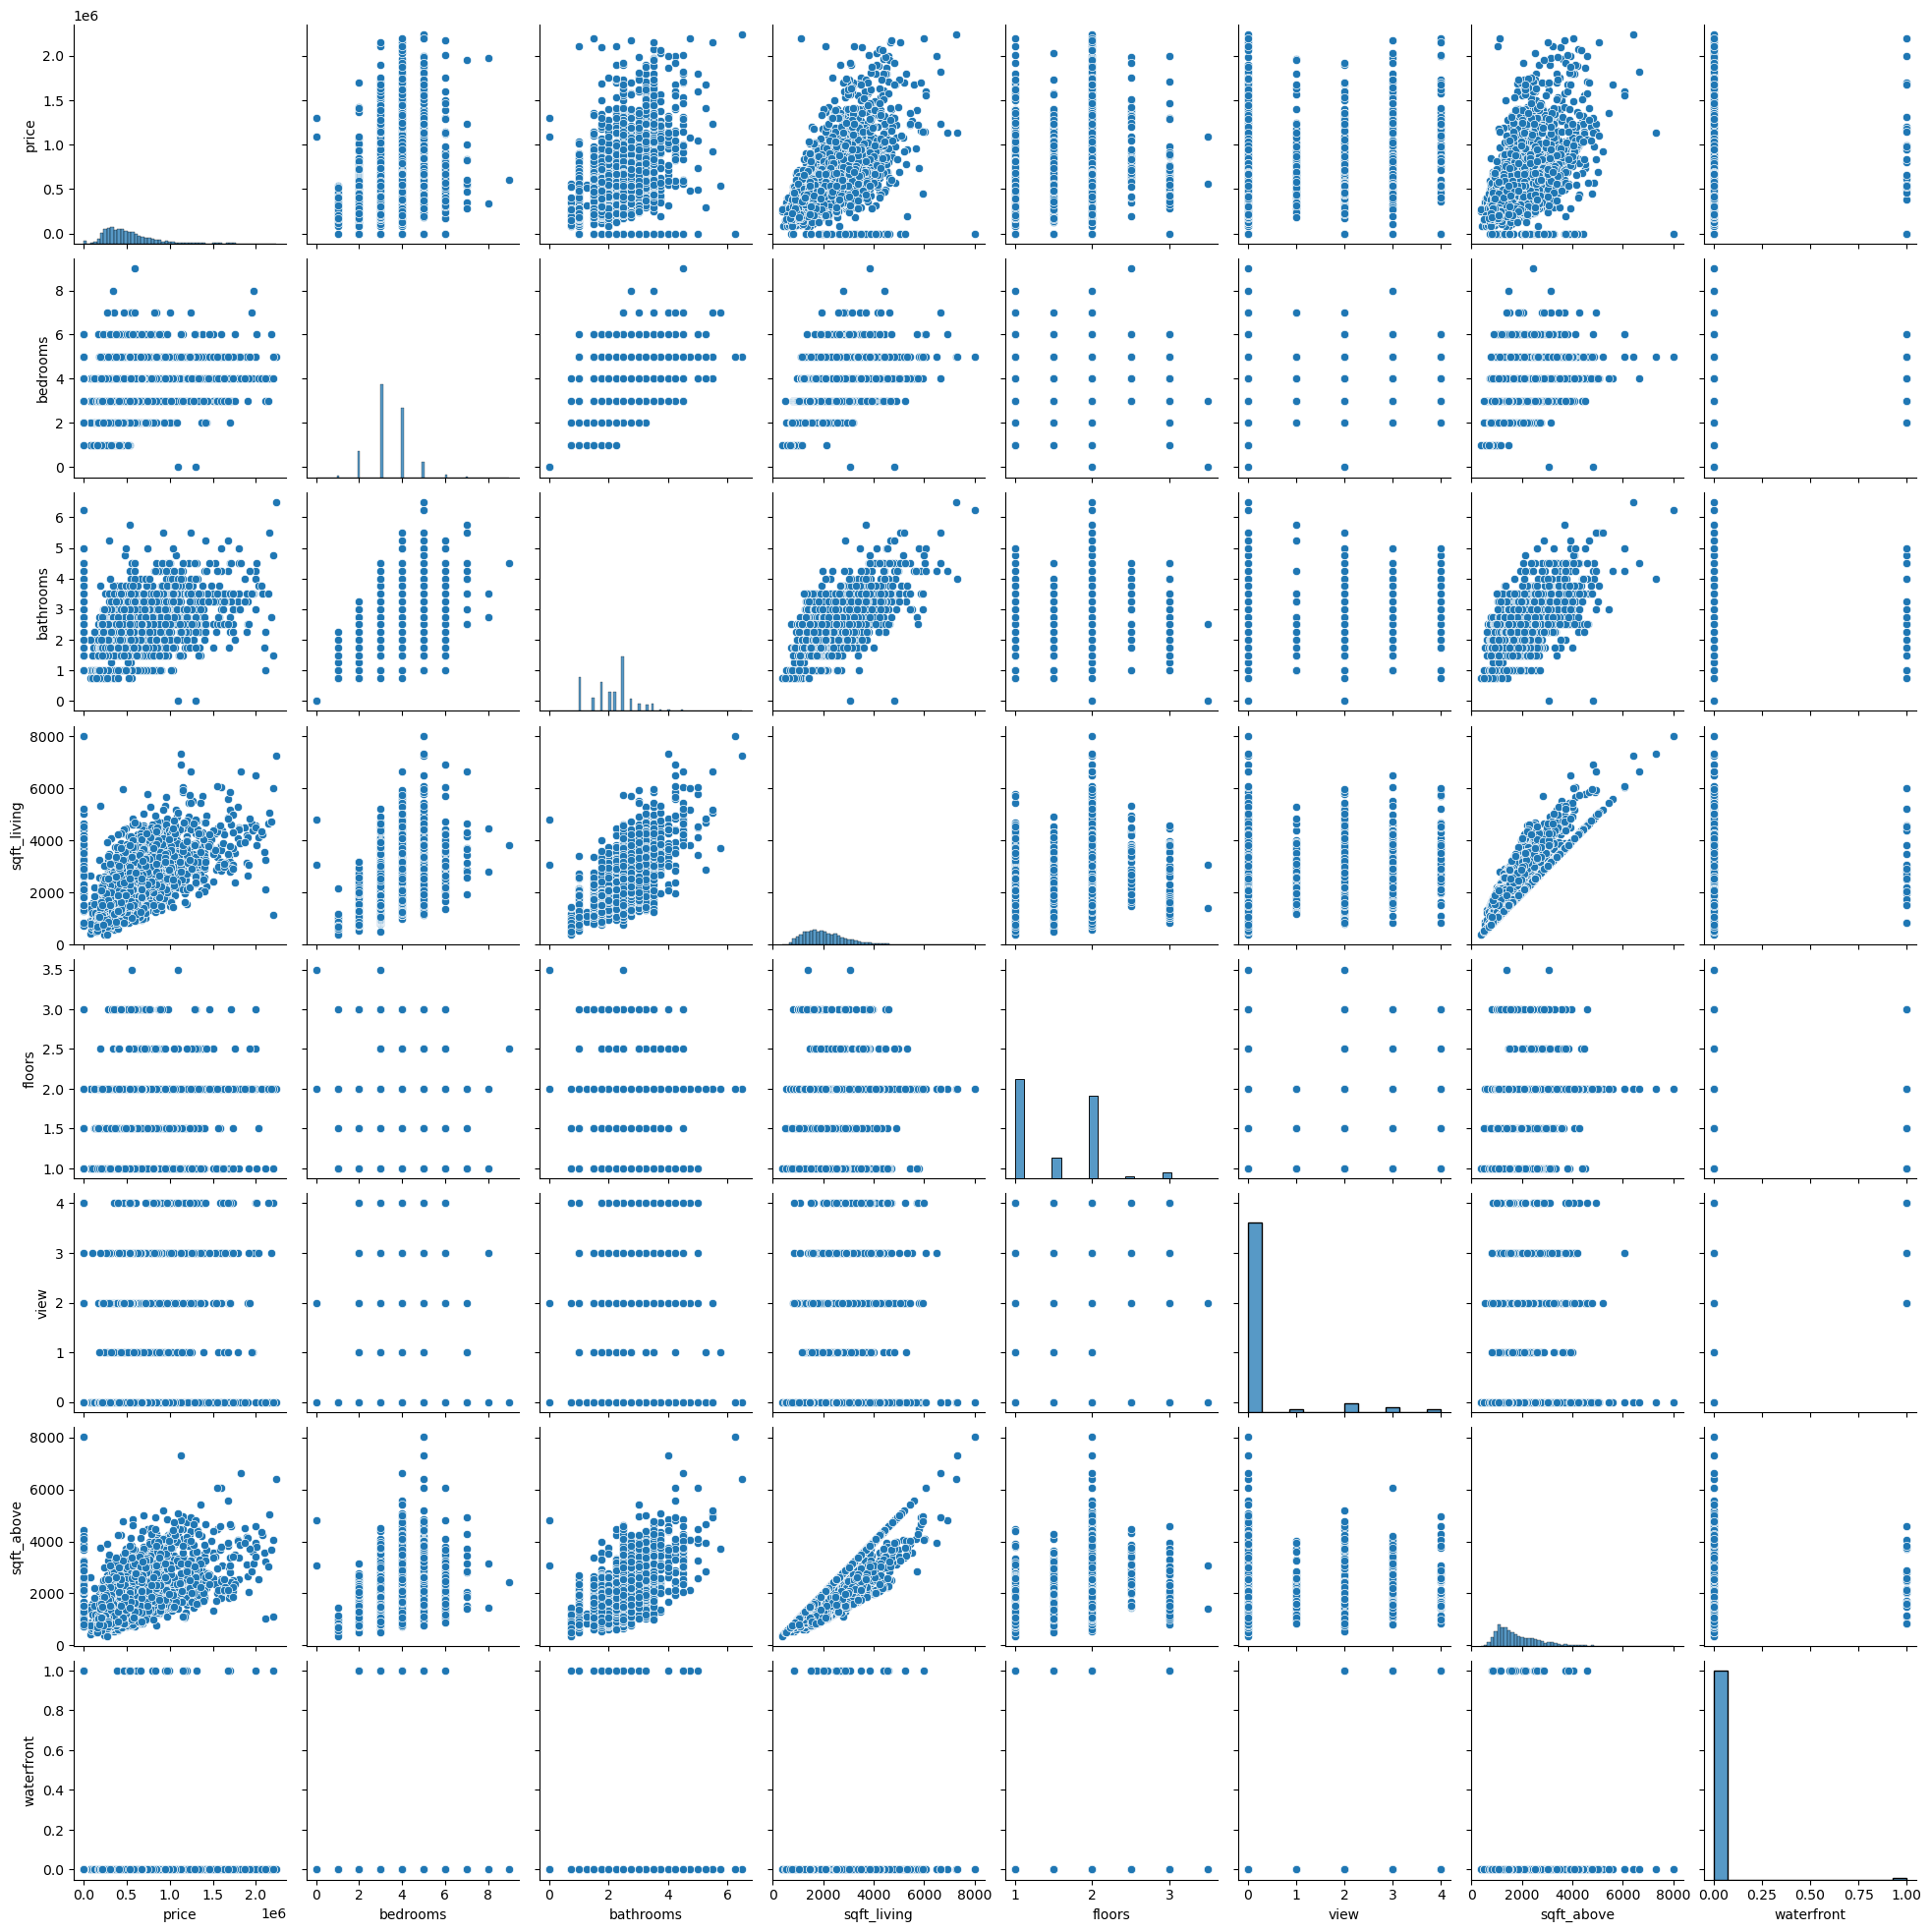

In [27]:
subset = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors','view','sqft_above','waterfront']
sns.pairplot(df[subset])
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['city', 'street', 'statezip'], drop_first=True)
# Selecting features and target variable
X = df.drop(['price', 'date', 'country'], axis=1)  # Features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 181011695733.15692
                     Coefficient
bedrooms             9025.362393
bathrooms          -10313.845111
sqft_living            74.662768
sqft_lot                7.888685
floors             -45055.396553
...                          ...
statezip_WA 98188 -222690.401619
statezip_WA 98198 -196724.778963
statezip_WA 98199  182022.192577
statezip_WA 98288 -101438.636666
statezip_WA 98354   18583.179778

[4622 rows x 1 columns]


In [31]:
from sklearn.metrics import r2_score

In [32]:
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: -1.2161512317793042


In [33]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Train the model
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

r2 = r2_score(y_test, y_pred_rf)
print(f"R-squared: {r2}")

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse_rf}")


R-squared: 0.6560145921947272
Mean Squared Error: 28096179124.157646


In [35]:
# Get feature importances
importances = model_rf.feature_importances_
features = X.columns

# Display feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                             Feature  Importance
2                        sqft_living    0.454278
10                          yr_built    0.045538
46                      city_Seattle    0.036577
8                         sqft_above    0.034247
4548               statezip_WA 98004    0.033341
...                              ...         ...
3576   street_5334-5394 134th Ave SE    0.000000
889         street_14206 284th Pl NE    0.000000
3569  street_5307-5311 Quincy Ave SE    0.000000
1959        street_22618 NE 143rd Ct    0.000000
1900        street_21909 NE 141st St    0.000000

[4622 rows x 2 columns]


In [36]:
# Initialize the Random Forest Regressor
model_rf2 = RandomForestRegressor(n_estimators=1000, random_state=42, max_depth=10, min_samples_split=4, min_samples_leaf=2)

# Train the model
model_rf2.fit(X_train, y_train)

y_pred_rf2 = model_rf2.predict(X_test)

r2_rf2 = r2_score(y_test, y_pred_rf2)
print(f"R-squared: {r2_rf2}")

mse_rf2 = mean_squared_error(y_test, y_pred_rf2)
print(f"Mean Squared Error: {mse_rf2}")


R-squared: 0.6228764315250175
Mean Squared Error: 30802851200.632313


In [37]:
# Get feature importances
importances2 = model_rf2.feature_importances_
features = X.columns

# Display feature importances
feature_importance_df2 = pd.DataFrame({'Feature': features, 'Importance': importances2})
feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=False)
print(feature_importance_df2)

                               Feature  Importance
2                          sqft_living    0.548321
10                            yr_built    0.052466
46                        city_Seattle    0.041683
4548                 statezip_WA 98004    0.040571
8                           sqft_above    0.035702
...                                ...         ...
1577          street_18926 NE 183rd St    0.000000
1578  street_18949 Mountain View Rd NE    0.000000
1579          street_18960 131st Pl NE    0.000000
1580    street_18975 Marine View Dr SW    0.000000
4621                 statezip_WA 98354    0.000000

[4622 rows x 2 columns]
